In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uncertainties as unc
import uncertainties.unumpy as unp
import random

from src import shiller
from matplotlib import rcParams

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
shiller.stock_returns.head()

1871.0         NaN
1872.0    0.148148
1873.0    0.113503
1874.0   -0.025751
1875.0    0.039648
dtype: float64

In [11]:
shiller.stock_increase.head()

1871.0     NaN
1872.0    0.72
1873.0    0.58
1874.0   -0.12
1875.0    0.18
dtype: float64

In [12]:
shiller.inflation.head()

1871.0         NaN
1872.0    0.015041
1873.0    0.022057
1874.0   -0.046157
1875.0   -0.074374
Name: CPI, dtype: float64

In [22]:
from src import simulation

# First, let's assume that Joyce needs $50k per year (before taxes) to live on.
yearly_expense = 50000.00

# Next, Joyce has saved half a million dollars for retirement.
starting_assets = 500000.00

# And Joyce invests half of her money in stocks and half in bonds.
stock_fraction = 0.5

# Joyce will retire at age 65.
starting_age = 65

# She lives in Iowa.
state_abbrev = 'IA'

# Joyce is a white female. 
demographic_group = 'white female'

loop = 100

histories = simulation.run_histories(starting_assets, yearly_expense, stock_fraction, starting_age,
              state_abbrev, demographic_group, loop)

In [23]:
histories[:2]

[array([500000.        , 472617.72940388, 461899.39264116,             nan]),
 array([500000.        , 263641.44578313, 251026.99415888, 232627.3388002 ,
        202862.19720629, 170158.969332  , 123254.78143727,  86800.50084097,
         45011.09248861,  -4201.93761212])]

In [24]:
final_assets = []
for i in range(loop):
    final_assets.append(histories[i][-1])

final_assets = np.array(final_assets)

run_out_of_money_hist = np.array(final_assets < 0.0, dtype=np.float64)
run_out_of_money = unc.ufloat(run_out_of_money_hist.mean(),
                              run_out_of_money_hist.std() / np.sqrt(loop))

print(' Chance of running out of money is {:%}'.format(run_out_of_money))

run_out_of_money

 Chance of running out of money is (71+/-5)%


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


0.71+/-0.045376205218153706

Text(0,0.5,'Probability')

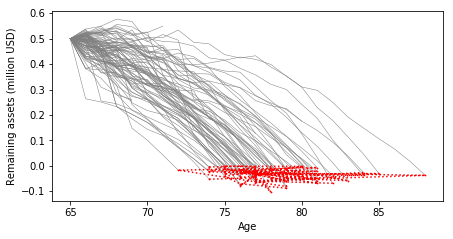

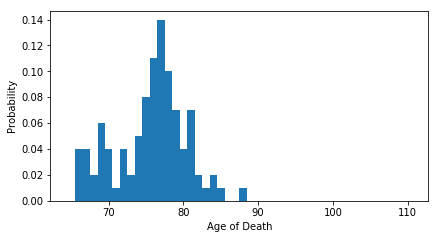

In [26]:
rcParams['figure.figsize'] = [7.0, 3.5]

# Plot of asset-over-lifetime histories
plt.figure()

final_ages = []
final_assets = []
for i in range(loop):
    y = histories[i] / 1e6
    x = np.arange(starting_age, starting_age+y.size)
    plt.plot(x, y, color='gray', linewidth=0.5)

    final_assets.append(y[-1])
    final_ages.append(x[-1])

plt.plot(final_ages, final_assets, color='red', ls=':',
         marker='.', markersize=1.5)

plt.xlabel('Age')
plt.ylabel('Remaining assets (million USD)')

# plt.savefig('figs/histories.pdf')


# Plot of age of death
rcParams['figure.subplot.left'] = 0.15
plt.figure()

final_ages = np.array(final_ages)

max_age = 110
bins = np.linspace(int(starting_age)-0.5, max_age+0.5, max_age-starting_age+2)

plt.hist(final_ages, bins=bins, normed=True)

plt.xlabel('Age of Death')
plt.ylabel('Probability')
